# CNN 

In [9]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
np.random.seed(7)
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [10]:
#define size to which images are to be resized
IMAGE_SIZE = [224, 224] # feel free to change depending on dataset

# training config:
epochs = 5
batch_size = 3

#define paths
covid_path = 'Ct_Scan_Dataset/covidct'
noncovid_path = 'Ct_Scan_Dataset/normalct'
Penomoni = 'Ct_Scan_Dataset/Penomoni'
Boronsit = 'Ct_Scan_Dataset/Boronsit'
Possible_Covid = 'Ct_Scan_Dataset/Possible Covid'
possible_Penomoni = 'Ct_Scan_Dataset/possible Penomoni'



# Use glob to grab images from path .jpg or jpeg
covid_files = glob(covid_path + '/*')
noncovid_files = glob(noncovid_path + '/*')
Possible_Covid_files = glob(Possible_Covid + '/*')
Penomoni_files = glob(Penomoni + '/*')
Boronsit_files = glob(Boronsit + '/*')
possible_Penomoni_files = glob(possible_Penomoni + '/*')

In [11]:
# Visualize file variable contents
print("First Covid Files: ",covid_files[0:1])
print("Total Count: ",len(covid_files))

print("First NonCovid Files: ",noncovid_files[0:1])
print("Total Count: ",len(noncovid_files))

print("First Possible_Covid Files: ",Possible_Covid_files[0:1])
print("Total Count: ",len(Possible_Covid_files))


print("First Penomoni Files: ",Penomoni_files[0:1])
print("Total Count: ",len(Penomoni_files))

print("First Boronsit Files: ",Boronsit_files[0:1])
print("Total Count: ",len(Boronsit_files))

print("First possible_Penomoni Files: ",possible_Penomoni_files[0:1])
print("Total Count: ",len(possible_Penomoni_files))

First Covid Files:  ['Ct_Scan_Dataset/covidct\\2020.02.10.20021584-p6-52%10.png']
Total Count:  24
First NonCovid Files:  ['Ct_Scan_Dataset/normalct\\0.jpg']
Total Count:  19
First Possible_Covid Files:  ['Ct_Scan_Dataset/Possible Covid\\2020.02.10.20021584-p6-52%10.png']
Total Count:  12
First Penomoni Files:  ['Ct_Scan_Dataset/Penomoni\\0.jpg']
Total Count:  16
First Boronsit Files:  ['Ct_Scan_Dataset/Boronsit\\2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%0.png']
Total Count:  12
First possible_Penomoni Files:  ['Ct_Scan_Dataset/possible Penomoni\\2020.02.10.20021584-p6-52%11.png']
Total Count:  12


In [12]:
# Fetch Images and Class Labels from Files
covid_labels = []
noncovid_labels = []
Possible_Covid_labels=[]
Penomoni_labels=[]
Boronsit_labels=[]
possible_Penomoni_labels=[]


covid_images=[]
noncovid_images=[]
Possible_Covid=[]
Penomoni=[]
Boronsit=[]
possible_Penomoni=[]


for i in range(len(covid_files)):
  image = cv2.imread(covid_files[i]) # read file 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # arrange format as per kera
  image = cv2.resize(image,(224,224)) # resize as per model
  covid_images.append(image) # append image
  covid_labels.append('CT_COVID') # append class label

for i in range(len(noncovid_files)):
  image = cv2.imread(noncovid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  noncovid_images.append(image)
  noncovid_labels.append('CT_NonCOVID')

for i in range(len(Possible_Covid_files)):
  image = cv2.imread(Possible_Covid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Possible_Covid.append(image)
  Possible_Covid_labels.append('Possible_Covid_files')

for i in range(len(Penomoni_files)):
  image = cv2.imread(Penomoni_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Penomoni.append(image)
  Penomoni_labels.append('Penomoni_files')



for i in range(len(Boronsit_files)):
  image = cv2.imread(Boronsit_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Boronsit.append(image)
  Boronsit_labels.append('Boronsit_files')



for i in range(len(possible_Penomoni_files)):
  image = cv2.imread(possible_Penomoni_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  possible_Penomoni.append(image)
  possible_Penomoni_labels.append('possible_Penomoni_files')


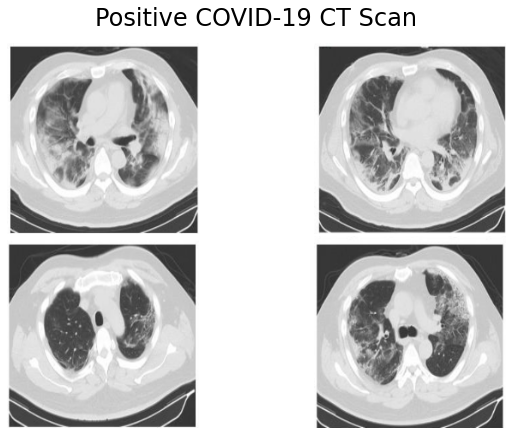

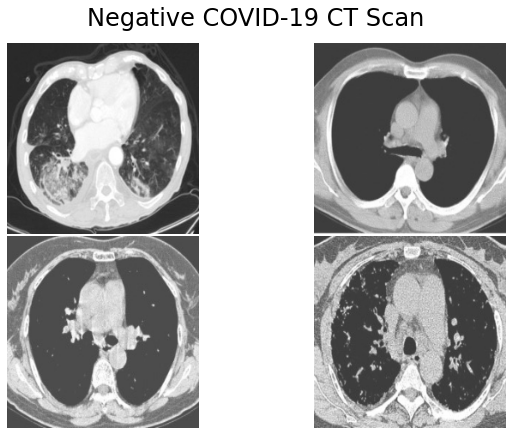

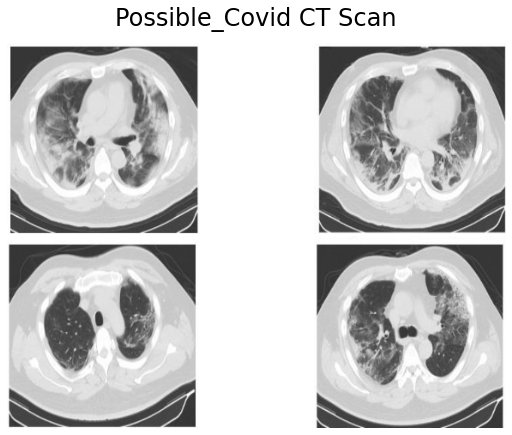

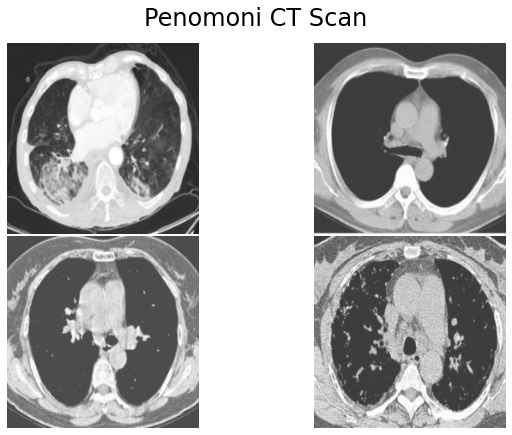

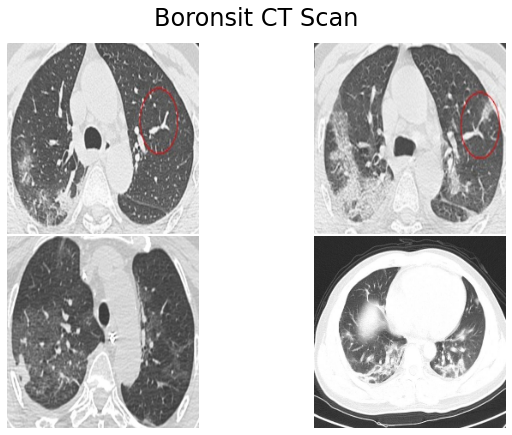

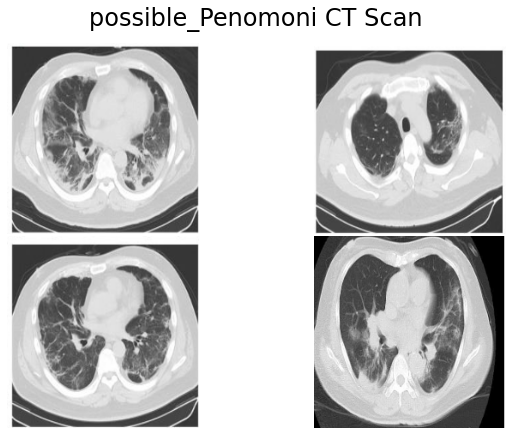

In [13]:
# look at a random image for fun
def plot_images(images, title):
    nrows, ncols = 2,2
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
    
    
plot_images(covid_images, 'Positive COVID-19 CT Scan')
plot_images(noncovid_images, 'Negative COVID-19 CT Scan')
plot_images(Possible_Covid, 'Possible_Covid CT Scan')
plot_images(Penomoni, 'Penomoni CT Scan')
plot_images(Boronsit, 'Boronsit CT Scan')
plot_images(possible_Penomoni, 'possible_Penomoni CT Scan')

In [14]:
# Convert to array and Normalize to interval of [0,1]
covid_images = np.array(covid_images) / 255
noncovid_images = np.array(noncovid_images) / 255
Possible_Covid= np.array(Possible_Covid) / 255
Penomoni= np.array(Penomoni) / 255
Boronsit= np.array(Boronsit) / 255
possible_Penomoni= np.array(possible_Penomoni) / 255

In [15]:
print('shape of all images:')
print(covid_images.shape)
print(noncovid_images.shape)
print(Possible_Covid.shape)
print(Penomoni.shape)
print(Boronsit.shape)
print(possible_Penomoni.shape)
all_images=np.concatenate((covid_images,noncovid_images,Possible_Covid,
                           Penomoni,Boronsit,possible_Penomoni),axis=0)
print('total images:%s'%(str(all_images.shape)))

shape of all images:
(24, 224, 224, 3)
(19, 224, 224, 3)
(12, 224, 224, 3)
(16, 224, 224, 3)
(12, 224, 224, 3)
(12, 224, 224, 3)
total images:(95, 224, 224, 3)


In [16]:
print('length of the labels:')
print(len(covid_labels))
print(len(noncovid_labels))
print(len(Possible_Covid_labels))
print(len(Penomoni_labels))
print(len(Boronsit_labels))
print(len(possible_Penomoni_labels))
all_labels=np.array(covid_labels+noncovid_labels+Possible_Covid_labels+\
            Penomoni_labels+Boronsit_labels+possible_Penomoni_labels)      

all_labels=all_labels.reshape(-1,1)  
print("labels shape: %s"%(str(all_labels.shape)))

length of the labels:
24
19
12
16
12
12
labels shape: (95, 1)


###  Convert Categorical label to one-hot

In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
onehot_labels = encoder.fit_transform(all_labels)
print(onehot_labels.shape)

(95, 6)


### **Train Test Split**

In [18]:
X_train,X_test,y_train,y_test=train_test_split(all_images,onehot_labels,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(76, 224, 224, 3)
(76, 6)
(19, 224, 224, 3)
(19, 6)


### Visualize a few images from Training and Test sets

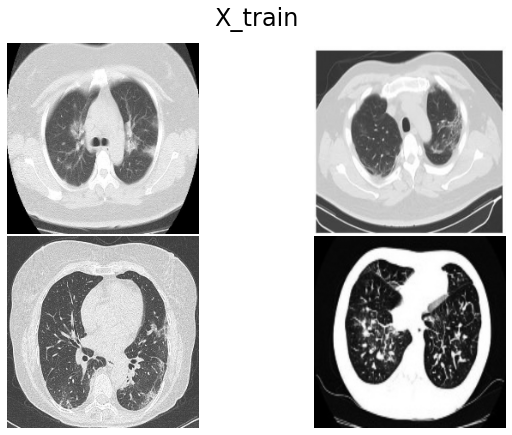

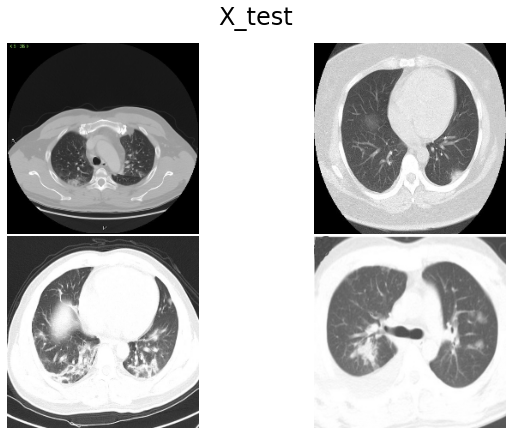

In [19]:
plot_images(X_train, 'X_train')
plot_images(X_test, 'X_test')
# y_train and y_test contain class lables 0 and 1 representing COVID and NonCOVID for X_train and X_test


In [20]:
#Build CNN model

model = Sequential()

model.add(Conv2D(64, (2,2), input_shape=(224,224,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(6,activation="softmax"))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 223, 223, 64)      832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 32)      8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 55, 55, 32)        0         
______________________

In [21]:
#Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [22]:
#Fit the model
history = model.fit(X_train,y_train, epochs=3,batch_size=10,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/3
76/76 [==============================] - 22s 288ms/step - loss: 11.0019 - acc: 0.1579
Epoch 2/3
76/76 [==============================] - 11s 139ms/step - loss: 5.1481 - acc: 0.2237
Epoch 3/3
76/76 [==============================] - 11s 138ms/step - loss: 1.9029 - acc: 0.1447


19/19 [==============================] - 1s 38ms/step

acc: 31.58%

loss: 178.40%


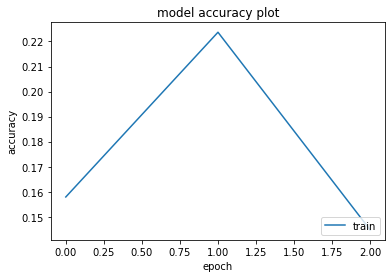

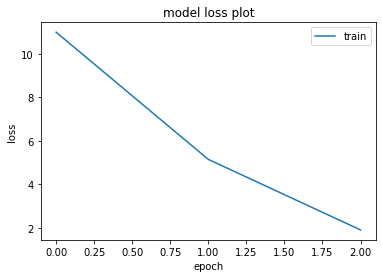

In [23]:
scores = model.evaluate(X_test,y_test)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

# Plot accuracy result
plt.plot(history.history['acc'])
plt.title('model accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Plot loss result
plt.plot(history.history['loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()